<a href="https://colab.research.google.com/github/mlan4/final_project/blob/master/final_project_mlan4_shemmat1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn as skl
import statsmodels.formula.api as smf
import statsmodels as sm
import sklearn.model_selection as ms
from datetime import datetime as dt



# Sets the random seed
np.random.seed(0)

# # Imports the file if it is not already imported
# ! if [ ! -e glm.training.data.csv ]; \
# then wget https://raw.githubusercontent.com/mlan4/final_project/master/glm.training.data.csv; \
# fi;
  
# # Imports the file if it is not already imported
# ! if [ ! -e glm.test.data.csv ]; \
# then wget https://raw.githubusercontent.com/mlan4/final_project/master/glm.test.data.csv; \
# fi;

# # Read the data into pandas dataframe  
# trainingdf = pd.read_csv("glm.training.data.csv")

# testdf = pd.read_csv("glm.test.data.csv")

testdf = pd.read_csv("https://www.dropbox.com/s/bwwoj1cdkqnoi87/glm.test.data.csv?dl=1", index_col = 0)
trainingdf = pd.read_csv("https://www.dropbox.com/s/h4ap7nyc7snf5ix/glm.training.data.csv?dl=1", index_col = 0)

# trainingdf.head(1)



/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:

normalized_dftr = (trainingdf - trainingdf.mean()) / trainingdf.std()
normalized_dftr = normalized_dftr.drop(['y'], axis = 1)
normalized_dftr = pd.concat([normalized_dftr, trainingdf[['y']]], axis = 1)
# print(normalized_dftr)
# print(np.max(trainingdf[['x.coag.sofa']]))
# print(np.mean(trainingdf[['x.coag.sofa']]))
# print(np.std(trainingdf[['x.coag.sofa']]))
# print((trainingdf[['x.coag.sofa']] - np.mean(trainingdf[['x.coag.sofa']])) / np.std(trainingdf[['x.coag.sofa']]))

In [0]:
alphas = np.linspace(0.0001, 0.001, num = 10)
trainingdfy1 = normalized_dftr.loc[(normalized_dftr.y == 1)]
trainingdfy0 = normalized_dftr.loc[(normalized_dftr.y == 0)]
# folds = ms.KFold(n_splits = 10)
# splitx = folds.split(trainingdfx)
# splity = folds.split(trainingdfy)





In [0]:
# # training_stoch = np.empty(np.amax(trainingdf[['patient']].values))
# # for stochind in range(0, np.amax(trainingdf[['patient']].values)):
# #   training_stoch = np.append(training_stoch, trainingdf.loc[(trainingdf.patient == stochind)])

xtr = normalized_dftr.drop(['y'], axis = 1)
ytr = normalized_dftr[['y']]

# xtr.shape[0]


# splitlist = np.intp(np.linspace(0, xtr.shape[0], num = 15763))
# counter = 1

# # print(splitlist)

# # print(splitlist)

# # glm = lm.LogisticRegressionCV(cv = 10, penalty = 'l1', solver = 'liblinear')
# # # glm.fit(xtr, np.ravel(ytr.values))
# # glm.fit(xtr.iloc[1315600:1315800], np.ravel(ytr.iloc[1315600:1315800]))

# # glm.fit(xtr.iloc[splitlist[83]:splitlist[84]], np.ravel(ytr.iloc[splitlist[83]:splitlist[84]]))

# # for splindex in splitlist:
# #   if counter == 15763:
# #     break
# #   if splitlist[counter] == 1315700 or splitlist[counter] == 1315800:
# #     print('hi')
# #   else:
# #     glm = lm.LogisticRegressionCV(cv = 10, penalty = 'l1', solver = 'liblinear', class_weight = glm.coef_)
# #     glm.fit(xtr.iloc[splindex:splitlist[counter]], ytr.iloc[splindex:splitlist[counter]])
# #   counter += 1
  

In [0]:
dfsplits = np.linspace(0, 1, num = 11)
count = 0
dfy1 = []
dfy0 = []
leny0 = len(trainingdfy0.index)
leny1 = len(trainingdfy1.index)
for splindex in dfsplits:
  if count == 10:
    break
  dfy1.append(trainingdfy1[np.int(np.floor(splindex * leny1)):np.int(np.floor(dfsplits[count + 1] * leny1))])
  dfy0.append(trainingdfy0[np.int(np.floor(splindex * leny0)):np.int(np.floor(dfsplits[count + 1] * leny0))])
  count += 1

In [0]:
# print(len(dfy1[9]))
# print(len(dfy0[1]))


In [0]:

# len(dfy1)
dfytot = []
# dfytemp = []
for appindex in range(0, 10):
  dfytot.append(pd.concat((dfy0[appindex], dfy1[appindex]), axis = 0))
#   dfytemp.append(pd.concat([dfy0[appindex], dfy1[appindex]], axis = 0))

In [0]:
#print(dfytot[0])

In [8]:
fites = []
for kindex in range(0, 10):
  dfytemp = []
  print('current k-fold is %f' %kindex)
  for appindex2 in range(0, 10):
    dfytemp.append(pd.concat([dfy0[appindex2], dfy1[appindex2]], axis = 0))
  dfyte = dfytemp.pop(kindex)
  dfytr = pd.concat([dfytemp[0], dfytemp[1], dfytemp[2], dfytemp[3], dfytemp[4], dfytemp[5], dfytemp[6], dfytemp[7], dfytemp[8]], axis = 0)
#   print(dfytr)
#   print(dfyte)
#   break
  dfytegt = dfyte[['y']]
  dfytepa = dfyte.drop(['y'], axis = 1)
  dfytrgt = dfytr[['y']]
  dfytrpa = dfytr.drop(['y'], axis = 1)  
# xte = testdf.drop(['y', 'patient'], axis = 1)
# gte = testdf[['y']]#   training = np.delete(dytot, kindex)
#   testing = dytot[kindex]
  alferror = []
  for alfindex in alphas:
    print('current regularization strength value is %f' %alfindex)
    # glm2 = lm.SGDClassifier(loss = 'log', penalty = 'l1', max_iter = 150)
# glm2.fit(xtr, np.ravel(ytr.values))
    glm = lm.SGDClassifier(loss = 'log', penalty = 'l1', alpha = alfindex, max_iter = 150) 
    glm.fit(dfytrpa, np.ravel(dfytrgt.values))
    dfyteyte = np.exp(dfytepa @ np.transpose(glm.coef_), dtype=np.float128) / (1 + np.exp(dfytepa @ np.transpose(glm.coef_), dtype=np.float128))
    error = np.sum((dfytegt.values - dfyteyte.values) ** 2) + alfindex * np.sum(np.abs(glm.coef_))
    alferror.append(error)
  
  fites.append(alferror)
  


    
    
    
    
    

current k-fold is 0.000000
current regularization strength value is 0.000100
current regularization strength value is 0.000200
current regularization strength value is 0.000300
current regularization strength value is 0.000400
current regularization strength value is 0.000500
current regularization strength value is 0.000600
current regularization strength value is 0.000700
current regularization strength value is 0.000800
current regularization strength value is 0.000900
current regularization strength value is 0.001000
current k-fold is 1.000000
current regularization strength value is 0.000100
current regularization strength value is 0.000200
current regularization strength value is 0.000300
current regularization strength value is 0.000400
current regularization strength value is 0.000500
current regularization strength value is 0.000600
current regularization strength value is 0.000700
current regularization strength value is 0.000800
current regularization strength value is 0.000

In [0]:
# fites[0]
fites2 = np.vstack((fites[0],fites[1],fites[2],fites[3],fites[4],fites[5],fites[6],fites[7],fites[8],fites[9]))
fites3 = np.mean(fites2, axis = 0)

In [0]:
# # glm.coef_.values
minind = np.argmin(fites3)
talpha = alphas[minind]
# print(fites3)
# print(fites2)

In [11]:
print('optimal regularization strength value is %f' %talpha)

optimal regularization strength value is 0.001000


In [12]:
glm2 = lm.SGDClassifier(loss = 'log', penalty = 'l1', alpha = talpha, max_iter = 150)
glm2.fit(xtr, np.ravel(ytr.values))

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=150,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
normalized_dfte = (testdf - testdf.mean())/testdf.std()
normalized_dfte = normalized_dfte.drop(['y', 'patient'], axis = 1)
normalized_dfte = pd.concat([normalized_dfte, testdf[['y']]], axis = 1)

In [0]:
gte = testdf[['y']]
xte = normalized_dfte.drop(['y'], axis = 1)
yte = np.exp(xte @ np.transpose(glm2.coef_)) / (1 + np.exp(xte @ np.transpose(glm2.coef_)))
# yte = glm2.predict(xte)

In [0]:
ytrte = np.exp(xtr @ np.transpose(glm2.coef_)) / (1 + np.exp(xtr @ np.transpose(glm2.coef_)))
# print(np.squeeze(ytrte.values.shape))
# print(np.ravel(ytr).shape)
# ytrte = glm2.predict(xtr)

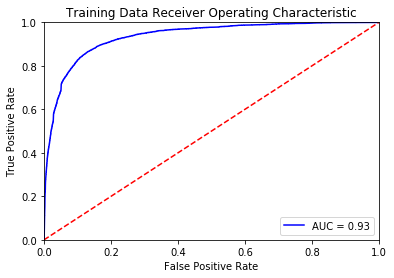

In [16]:
fpr_tr, tpr_tr, threshold_tr = skl.metrics.roc_curve(ytr.values, ytrte)
roc_auc_tr = skl.metrics.auc(fpr_tr, tpr_tr)

plt.title('Training Data Receiver Operating Characteristic')
plt.plot(fpr_tr, tpr_tr, 'b', label = 'AUC = %0.2f' % roc_auc_tr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

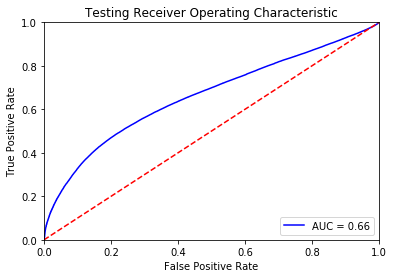

In [17]:
fpr_te, tpr_te, threshold_te = skl.metrics.roc_curve(gte.values, yte)
roc_auc_te = skl.metrics.auc(fpr_te, tpr_te)

plt.title('Testing Receiver Operating Characteristic')
plt.plot(fpr_te, tpr_te, 'b', label = 'AUC = %0.2f' % roc_auc_te)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Optimal threshold for testing data is 0.700784
optimal threshold testing sensitivity is 0.584435
optimal threshold testing specificity is 0.672449


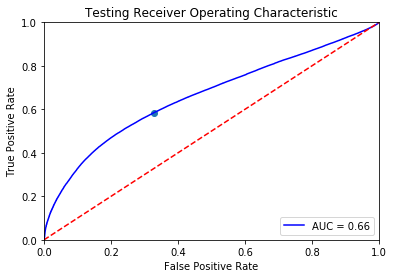

In [18]:
dist_te = (fpr_te ** 2 + (tpr_te - 1) ** 2) ** (0.5)
thrindex_te = np.argmin(dist_te)
three_te = threshold_te[thrindex_te]
print('Optimal threshold for testing data is %f' %three_te)
otpr_te = tpr_te[thrindex_te]
ofpr_te = fpr_te[thrindex_te]
print('optimal threshold testing sensitivity is %f' %otpr_te)
print('optimal threshold testing specificity is %f' %(1-ofpr_te))


plt.title('Testing Receiver Operating Characteristic')
plt.plot(fpr_te, tpr_te, 'b', label = 'AUC = %0.2f' % roc_auc_te)
plt.scatter(ofpr_te, otpr_te)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Optimal threshold value for training data is 0.775937
optimal threshold training sensitivity is 0.865317
optimal threshold training specificity is 0.869714


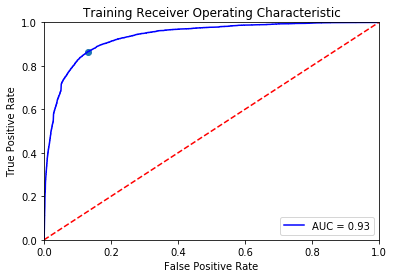

In [19]:
dist_tr = (fpr_tr ** 2 + (tpr_tr - 1) ** 2) ** (0.5)
thrindex_tr = np.argmin(dist_tr)
three_tr = threshold_tr[thrindex_tr]
print('Optimal threshold value for training data is %f' %three_tr)

otpr_tr = tpr_tr[thrindex_tr]
ofpr_tr = fpr_tr[thrindex_tr]

print('optimal threshold training sensitivity is %f' %otpr_tr)
print('optimal threshold training specificity is %f' %(1-ofpr_tr))

plt.title('Training Receiver Operating Characteristic')
plt.plot(fpr_tr, tpr_tr, 'b', label = 'AUC = %0.2f' % roc_auc_tr)
plt.scatter(ofpr_tr, otpr_tr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
timestamps = pd.read_csv("https://www.dropbox.com/s/s2jvnr4th6zzibf/timestamps.test.csv?dl=1", index_col = 0)
onsets = pd.read_csv("https://www.dropbox.com/s/uy9ngm0nuo0nmdp/test.onsets.csv?dl=1", index_col = 0)
# timestamps.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
# testdf[['y']]

In [22]:
# norm_dfte = (testdf - testdf.mean())/testdf.std()
# norm_dfte = norm_dfte.drop(['y'], axis = 1)
# norm_dfte = pd.concat([norm_dfte, testdf[['y']]], axis = 1)
ytimete = pd.concat([testdf[['patient']], testdf[['y']], yte, timestamps], axis = 1)
ysep = ytimete.loc[(ytimete.y == 1)]
# tsf = timestamps[(ytimete.y == 1)]
ysep.rename(columns={0: "yte"}, inplace = True)
# print(ysep)
# ysep.head()
ysep.yte.values[(ysep.yte > three_te)] = 1
ysep.yte.values[(ysep.yte < three_te)] = 0
# print(ysep)



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [0]:
tetimes = []


In [0]:
# ysep[ysep.patient == 5630]

In [0]:
# ysep[ysep.patient == 5630][ysep.yte == 1]

In [26]:
pnum = 6737 - 1113
for pindex in range(pnum, 6738):
  yseptes = ysep[ysep.patient == pindex][ysep.yte == 1]
  if len(yseptes) > 0:
    tetimes.append(yseptes.x.values[0])
  else:
    tetimes.append(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Median Early Warning Time: 6.500000 hours


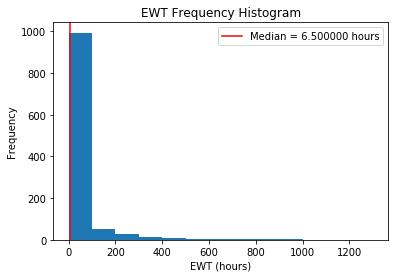

In [27]:
warn = []

for windex in range(0, len(tetimes)):
  if tetimes[windex] == 0:
    warn.append(0)
  else:
    tetimes_val = dt.strptime(np.str(tetimes[windex]),'%Y-%m-%d %H:%M:%S')
    tets = tetimes_val.timestamp()
    ons_val = dt.strptime(np.str(onsets.values[windex][0]),'%Y-%m-%d %H:%M:%S')
    onss = ons_val.timestamp()
    warn.append(onss - tets)

warn = np.array(warn)/3600

median = np.median(warn)
print('Median Early Warning Time: %f hours' %median)

warbins = np.arange(0,np.max(warn), 100)

plt.figure()
plt.hist(warn, bins = warbins)
plt.xlabel('EWT (hours)')
plt.ylabel('Frequency')
plt.title('EWT Frequency Histogram')

plt.axvline(x=median, color = 'r',label = 'Median = %f hours' %median)
plt.legend(loc = 'upper right')



In [0]:
# onsets.values.size
# tetimes

# print(np.argmax(warn))
# print(tetimes[420:430])
# print(onsets.values[423][0])

In [29]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
smot = SMOTE(sampling_strategy='minority', random_state=7)

# # Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = smot.fit_sample(xtr, np.ravel(ytr.values))
# oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainX), pd.DataFrame(oversampled_trainY)], axis=1)
oversampled_train.columns = trainingdf.columns


In [0]:
# print(xtr.shape)
# print((oversampled_train.y.values == 1).shape)
# print((oversampled_train.y.values == 0).shape)

In [32]:
alphas2 = np.linspace(0.0001, 0.001, num = 10)
trainingdfy12 = oversampled_train.loc[(oversampled_train.y == 1)]
trainingdfy02 = oversampled_train.loc[(oversampled_train.y == 0)]
dfsplits2 = np.linspace(0, 1, num = 11)
count2 = 0
dfy12 = []
dfy02 = []
leny02 = len(trainingdfy02.index)
leny12 = len(trainingdfy12.index)
for splindex2 in dfsplits2:
  if count2 == 10:
    break
  dfy12.append(trainingdfy12[np.int(np.floor(splindex2 * leny12)):np.int(np.floor(dfsplits2[count2 + 1] * leny12))])
  dfy02.append(trainingdfy02[np.int(np.floor(splindex2 * leny02)):np.int(np.floor(dfsplits2[count2 + 1] * leny02))])
  count2 += 1
  
fites12 = []
for kindex2 in range(0, 10):
  dfytemp2 = []
  print('current k-fold is %f' %kindex2)
  for appindex22 in range(0, 10):
    dfytemp2.append(pd.concat([dfy02[appindex22], dfy12[appindex22]], axis = 0))
  dfyte2 = dfytemp2.pop(kindex2)
  dfytr2 = pd.concat([dfytemp2[0], dfytemp2[1], dfytemp2[2], dfytemp2[3], dfytemp2[4], dfytemp2[5], dfytemp2[6], dfytemp2[7], dfytemp2[8]], axis = 0)
#   print(dfytr)
#   print(dfyte)
#   break
  dfytegt2 = dfyte2[['y']]
  dfytepa2 = dfyte2.drop(['y'], axis = 1)
  dfytrgt2 = dfytr2[['y']]
  dfytrpa2 = dfytr2.drop(['y'], axis = 1)  
# xte = testdf.drop(['y', 'patient'], axis = 1)
# gte = testdf[['y']]#   training = np.delete(dytot, kindex)
#   testing = dytot[kindex]
  alferror2 = []
  for alfindex2 in alphas2:
    print('current regularization strength value is %f' %alfindex2)
    # glm2 = lm.SGDClassifier(loss = 'log', penalty = 'l1', max_iter = 150)
# glm2.fit(xtr, np.ravel(ytr.values))
    glm12 = lm.SGDClassifier(loss = 'log', penalty = 'l1', alpha = alfindex2, max_iter = 150) 
    glm12.fit(dfytrpa2, np.ravel(dfytrgt2.values))
    dfyteyte2 = np.exp(dfytepa2 @ np.transpose(glm12.coef_), dtype=np.float128) / (1 + np.exp(dfytepa2 @ np.transpose(glm12.coef_), dtype=np.float128))
    error2 = np.sum((dfytegt2.values - dfyteyte2.values) ** 2) + alfindex2 * np.sum(np.abs(glm12.coef_))
    alferror2.append(error2)
  
  fites12.append(alferror2)
  
fites22 = np.vstack((fites12[0],fites12[1],fites12[2],fites12[3],fites12[4],fites12[5],fites12[6],fites12[7],fites12[8],fites12[9]))
fites32 = np.mean(fites22, axis = 0)

minind2 = np.argmin(fites32)
talpha2 = alphas2[minind2]
print('Optimal regularization strength value is %f' %talpha2)
# glm22 = lm.SGDClassifier(loss = 'log', penalty = 'l1', alpha = talpha2, max_iter = 150)
# glm22.fit(oversampled_train.drop('y', axis=1), np.ravel(oversampled_train['y'].values))

# gte2 = testdf[['y']]
# xte2 = normalized_dfte.drop(['y'], axis = 1)
# # yte2 = np.exp(xte @ np.transpose(glm22.coef_)) / (1 + np.exp(xte @ np.transpose(glm22.coef_)))
# yte2 = glm2.predict(xte)
# # ytrte2 = np.exp(oversampled_train.drop('y', axis = 1) @ np.transpose(glm22.coef_)) / (1 + np.exp(oversampled_train.drop('y', axis = 1) @ np.transpose(glm22.coef_)))
# ytrte2 = glm2.predict(oversampled_train.drop('y', axis = 1))
# fpr_tr2, tpr_tr2, threshold_tr2 = skl.metrics.roc_curve(oversampled_train['y'].values, ytrte2)
# roc_auc_tr2 = skl.metrics.auc(fpr_tr2, tpr_tr2)

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr_tr2, tpr_tr2, 'b', label = 'AUC = %0.2f' % roc_auc_tr2)
# plt.legend(loc = 'lower right')
# # plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

# fpr_te2, tpr_te2, threshold_te2 = skl.metrics.roc_curve(gte2.values, yte2)
# roc_auc_te2 = skl.metrics.auc(fpr_te2, tpr_te2)

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr_te2, tpr_te2, 'b', label = 'AUC = %0.2f' % roc_auc_te2)
# plt.legend(loc = 'lower right')
# # plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

# dist_te2 = (fpr_te2 ** 2 + (tpr_te2 - 1) ** 2) ** (0.5)
# thrindex_te2 = np.argmin(dist_te2)
# three_te2 = threshold_te2[thrindex_te2]
# print(three_te2)

# dist_tr2 = (fpr_tr2 ** 2 + (tpr_tr2 - 1) ** 2) ** (0.5)
# thrindex_tr2 = np.argmin(dist_tr2)
# three_tr2 = threshold_tr2[thrindex_tr2]
# print(three_tr2)


current k-fold is 0.000000
current regularization strength value is 0.000100
current regularization strength value is 0.000200
current regularization strength value is 0.000300
current regularization strength value is 0.000400
current regularization strength value is 0.000500
current regularization strength value is 0.000600
current regularization strength value is 0.000700
current regularization strength value is 0.000800
current regularization strength value is 0.000900
current regularization strength value is 0.001000
current k-fold is 1.000000
current regularization strength value is 0.000100
current regularization strength value is 0.000200
current regularization strength value is 0.000300
current regularization strength value is 0.000400
current regularization strength value is 0.000500
current regularization strength value is 0.000600
current regularization strength value is 0.000700
current regularization strength value is 0.000800
current regularization strength value is 0.000

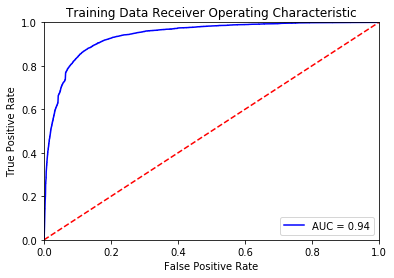

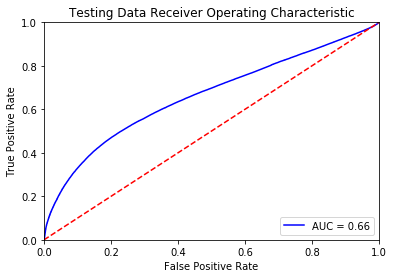

optimal testing data threshold is 0.720324
optimal training data threshold is 0.805552


In [33]:
glm22 = lm.SGDClassifier(loss = 'log', penalty = 'l1', alpha = talpha2, max_iter = 150)
glm22.fit(oversampled_train.drop('y', axis=1), np.ravel(oversampled_train['y'].values))
gte2 = testdf[['y']]
xte2 = normalized_dfte.drop(['y'], axis = 1)
yte2 = np.exp(xte @ np.transpose(glm22.coef_), dtype=np.float128) / (1 + np.exp(xte @ np.transpose(glm22.coef_), dtype=np.float128))
# yte2.values[yte2.values == 'NaN'] = 0
# yte2 = glm22.predict(xte)
ytrte2 = np.exp(oversampled_train.drop('y', axis = 1) @ np.transpose(glm22.coef_)) / (1 + np.exp(oversampled_train.drop('y', axis = 1) @ np.transpose(glm22.coef_)))
# ytrte2 = glm2.predict(oversampled_train.drop('y', axis = 1))
fpr_tr2, tpr_tr2, threshold_tr2 = skl.metrics.roc_curve(oversampled_train['y'].values, ytrte2)
roc_auc_tr2 = skl.metrics.auc(fpr_tr2, tpr_tr2)

plt.title('Training Data Receiver Operating Characteristic')
plt.plot(fpr_tr2, tpr_tr2, 'b', label = 'AUC = %0.2f' % roc_auc_tr2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

fpr_te2, tpr_te2, threshold_te2 = skl.metrics.roc_curve(gte2.values, yte2)
roc_auc_te2 = skl.metrics.auc(fpr_te2, tpr_te2)

plt.title('Testing Data Receiver Operating Characteristic')
plt.plot(fpr_te2, tpr_te2, 'b', label = 'AUC = %0.2f' % roc_auc_te2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

dist_te2 = (fpr_te2 ** 2 + (tpr_te2 - 1) ** 2) ** (0.5)
thrindex_te2 = np.argmin(dist_te2)
three_te2 = threshold_te2[thrindex_te2]
print('optimal testing data threshold is %f' %three_te2)

dist_tr2 = (fpr_tr2 ** 2 + (tpr_tr2 - 1) ** 2) ** (0.5)
thrindex_tr2 = np.argmin(dist_tr2)
three_tr2 = threshold_tr2[thrindex_tr2]
print('optimal training data threshold is %f' %three_tr2)


In [0]:
# yte2 = np.exp(xte @ np.transpose(glm22.coef_)) / (1 + np.exp(xte @ np.transpose(glm22.coef_)))
# yte2.values[yte2.values == 'NaN'] = 0
# np.max(yte2)
# np.exp(xte @ np.transpose(glm22.coef_), dtype=np.float128)

optimal threshold testing sensitivity is 0.584133
optimal threshold testing specificity is 0.670240
optimal threshold training sensitivity is 0.872685
optimal threshold training specificity is 0.876931


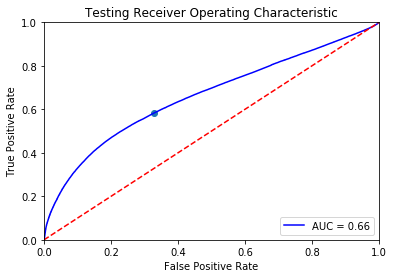

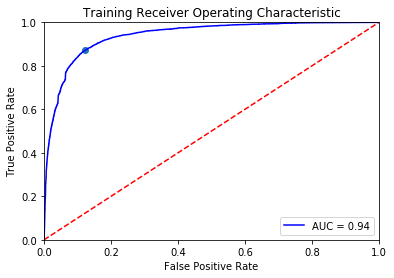

In [35]:
otpr_te2 = tpr_te2[thrindex_te2]
ofpr_te2 = fpr_te2[thrindex_te2]
otpr_tr2 = tpr_tr2[thrindex_tr2]
ofpr_tr2 = fpr_tr2[thrindex_tr2]

print('optimal threshold testing sensitivity is %f' %otpr_te2)
print('optimal threshold testing specificity is %f' %(1-ofpr_te2))
print('optimal threshold training sensitivity is %f' %otpr_tr2)
print('optimal threshold training specificity is %f' %(1-ofpr_tr2))

plt.title('Testing Receiver Operating Characteristic')
plt.plot(fpr_te2, tpr_te2, 'b', label = 'AUC = %0.2f' % roc_auc_te2)
plt.scatter(ofpr_te2, otpr_te2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.title('Training Receiver Operating Characteristic')
plt.plot(fpr_tr2, tpr_tr2, 'b', label = 'AUC = %0.2f' % roc_auc_tr2)
plt.scatter(ofpr_tr2, otpr_tr2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Median Early Warning Time: 6.316667 hours


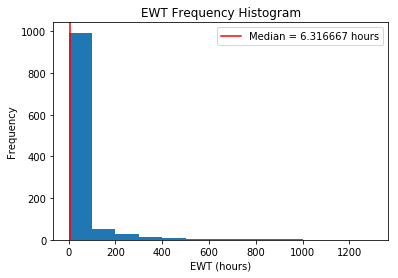

In [36]:
ytimete2 = pd.concat([testdf[['patient']], testdf[['y']], yte2, timestamps], axis = 1)
ysep2 = ytimete2.loc[(ytimete2.y == 1)]
# tsf = timestamps[(ytimete.y == 1)]
ysep2.rename(columns={0: "yte2"}, inplace = True)
# print(ysep)
# ysep.head()
ysep2.yte2.values[(ysep2.yte2 > three_te2)] = 1
ysep2.yte2.values[(ysep2.yte2 < three_te2)] = 0
# print(ysep)
tetimes2 = []
pnum2 = 6737 - 1113
for pindex2 in range(pnum2, 6738):
  yseptes2 = ysep2[ysep2.patient == pindex2][ysep2.yte2 == 1]
  if len(yseptes2) > 0:
    tetimes2.append(yseptes2.x.values[0])
  else:
    tetimes2.append(0)

warn2 = []

for windex2 in range(0, len(tetimes2)):
  if tetimes2[windex2] == 0:
    warn2.append(0)
  else:
    tetimes_val2 = dt.strptime(np.str(tetimes2[windex2]),'%Y-%m-%d %H:%M:%S')
    tets2 = tetimes_val2.timestamp()
    ons_val2 = dt.strptime(np.str(onsets.values[windex2][0]),'%Y-%m-%d %H:%M:%S')
    onss2 = ons_val2.timestamp()
    warn2.append(onss2 - tets2)

warn2 = np.array(warn2)/3600
# warn[difference < 0] = 0

median2 = np.median(warn2)
print('Median Early Warning Time: %f hours' %median2)

# def roundup(x):
#   return int(math.ceil(x / 50)) * 50

# maximum = roundup(max(difference))
warbins2 = np.arange(0,np.max(warn2), 100)

plt.figure()
plt.hist(warn2, bins = warbins2)
plt.xlabel('EWT (hours)')
plt.ylabel('Frequency')
plt.title('EWT Frequency Histogram')

plt.axvline(x=median2, color = 'r',label = 'Median = %f hours' %median2)
plt.legend(loc = 'upper right')

In [0]:
# tetimes2

In [0]:
# plt.figure()
# plt.plot(yte)
# plt.plot(gte.values)

In [0]:
# normalized_dftr

In [0]:
# print(splindex)
# print(splitlist[counter])
# print(counter)
# print(xtr.iloc[splindex:splitlist[counter]])
# print(ytr.iloc[splindex:splitlist[counter]])
# print(ytr.iloc[splitlist[84]:splitlist[85]])
# trainingdf.loc[(trainingdf.y == 1)]
# print(ytr.axes)

In [0]:
# xtr.axes[1][1]


In [0]:
# ytr.axes

In [0]:
# glm = lm.LogisticRegressionCV(cv = 10, penalty = 'l1', solver = 'saga')
# # glm.fit(xtr, np.ravel(ytr.values))

# glm = lm.LogisticRegression(penalty = 'l1', solver = 'saga', max_iter = 150, C = 600)
# glm.fit(xtr, np.ravel(ytr.values))



In [0]:
# glm2 = lm.SGDClassifier(loss = 'log', penalty = 'l1', max_iter = 150)
# glm2.fit(xtr, np.ravel(ytr.values))
# scores = skl.model_selection.cross_val_score(glm, xtr, np.ravel(ytr), cv=10)

In [0]:
# print(glm.coef_)
# # print(glm.alpha_)
# glm.get_params

In [0]:
# xte = testdf.drop(['y', 'patient'], axis = 1)
# gte = testdf[['y']]



In [0]:
# glm.coef_.shape
# xte.shape

In [0]:
# yte = np.exp(xte @ glm.coef_) / (1 + np.exp(xte @ glm.coef_))

In [0]:
# plt.figure()
# plt.plot(gte)
# plt.plot(yte)
# plt.legend(['gte', 'yte'])

In [0]:
# verify = trainingdf.loc[(trainingdf.y == 1)]
# verify.axes

In [0]:
# fpr, tpr, threshold = skl.metrics.roc_curve(gte, yte)
# roc_auc = skl.metrics.auc(fpr, tpr)


In [0]:
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [0]:
# trainingdf.loc[(trainingdf.y == 1)]


In [0]:
# normalized_dftr

In [0]:
# print(alphas)
# print(splitx)
# print(splity)

In [0]:
# count
# np.int(np.floor(dfsplits[count + 1] * leny1))
# dfytot[0]

In [0]:
# splitx

In [0]:
# scores = []
# cv = KFold(n_splits=10)
# for train_index, test_index in cv.split(X):

#     X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
#     best_svr.fit(X_train, y_train)
#     scores.append(best_svr.score(X_test, y_test))  

In [0]:
# print(len(dfytot))
# print(len(dfytemp))
# dfytemp.pop(0)
# print(len(dfytemp))
# print(len(training))
# print(len(dfytot))

In [0]:
# dfytegt.values
# dfyteyte.values
# alferror
# error
# alfindex
# glm.coef_
# np.sum(np.abs(glm.coef_))
# for testindex in range(0, 10):
#   print(fites[testindex])
# print(dfytepa)

In [0]:
# tpr

In [0]:
# fpr

In [0]:
# np.sum((gte.values - yte.values) ** 2)

In [0]:
# three

In [0]:
# threshold